In [1]:
# packages used in this tutorial 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 

import tensorflow as tf
from tensorflow import keras
%matplotlib inline

# part of this is adapted from 
# https://towardsdatascience.com/linear-regression-on-boston-housing-dataset-f409b7e4a155

In [2]:
predictors = pd.read_csv('SESA_predictors_final.csv')

In [3]:
predictors

,time,ENSO,PDO,AMV,SNA,lon,GRAD,TMF,WDMF,HDMF,QV,SAM
0,1949,25.889908,-1.682120,0.055977,26.634777,340.0,-0.393548,-63.756079,-61.436730,-6.346638,4.027290,-2.264632
1,1950,24.644358,-1.656283,-0.002819,26.943346,340.0,-1.160739,-1.661660,-1.997012,-0.651827,0.987180,-1.846696
2,1951,25.366077,-1.739386,0.071659,26.900610,340.0,1.964946,5.257056,6.081561,-0.257847,-0.566658,-0.699164
3,1952,26.729053,-1.698638,0.058565,26.813490,340.0,-1.532392,-5.095347,-4.735496,1.039970,-1.399819,-1.751757
4,1953,26.601658,-1.910678,0.222424,27.190292,340.0,-0.217099,0.897549,3.373979,0.335203,-2.811634,-1.705375
...,...,...,...,...,...,...,...,...,...,...,...,...
67,2016,29.093943,-1.867435,0.232822,27.606720,340.0,-1.374376,37.100743,25.842593,6.843624,4.414527,0.788260
68,2017,26.244295,-1.882998,0.305046,27.678885,340.0,-0.799298,19.503688,12.921880,3.953870,2.627938,-0.003212
69,2018,25.634764,-1.618691,0.261969,27.395810,340.0,2.004310,5.351652,-0.297280,5.124919,0.524013,0.977473
70,2019,27.314991,-1.733327,0.069532,27.353548,340.0,-0.252742,16.627084,10.840434,3.317132,2.469518,0.700910


In [4]:
predictors = predictors.drop(columns = ['time'])
predictors = predictors.drop(columns = ['lon'])

In [5]:
predictors

,ENSO,PDO,AMV,SNA,GRAD,TMF,WDMF,HDMF,QV,SAM
0,25.889908,-1.682120,0.055977,26.634777,-0.393548,-63.756079,-61.436730,-6.346638,4.027290,-2.264632
1,24.644358,-1.656283,-0.002819,26.943346,-1.160739,-1.661660,-1.997012,-0.651827,0.987180,-1.846696
2,25.366077,-1.739386,0.071659,26.900610,1.964946,5.257056,6.081561,-0.257847,-0.566658,-0.699164
3,26.729053,-1.698638,0.058565,26.813490,-1.532392,-5.095347,-4.735496,1.039970,-1.399819,-1.751757
4,26.601658,-1.910678,0.222424,27.190292,-0.217099,0.897549,3.373979,0.335203,-2.811634,-1.705375
...,...,...,...,...,...,...,...,...,...,...
67,29.093943,-1.867435,0.232822,27.606720,-1.374376,37.100743,25.842593,6.843624,4.414527,0.788260
68,26.244295,-1.882998,0.305046,27.678885,-0.799298,19.503688,12.921880,3.953870,2.627938,-0.003212
69,25.634764,-1.618691,0.261969,27.395810,2.004310,5.351652,-0.297280,5.124919,0.524013,0.977473
70,27.314991,-1.733327,0.069532,27.353548,-0.252742,16.627084,10.840434,3.317132,2.469518,0.700910


In [6]:
pwd

'/Users/ariannavaruolo/research_notebooks/ML'

In [7]:
pr = pd.read_csv('/SESA_precipitation_anom.csv')

In [8]:
pr = pr.drop(columns = ['time'])

In [9]:
pr

,PR
0,-77.771730
1,-52.998200
2,17.117737
3,-63.901855
4,-67.280270
...,...
67,125.100525
68,15.529511
69,-38.272583
70,30.939514


In [10]:
pr['PR']

0     -77.771730
1     -52.998200
2      17.117737
3     -63.901855
4     -67.280270
         ...    
67    125.100525
68     15.529511
69    -38.272583
70     30.939514
71    -20.987396
Name: PR, Length: 72, dtype: float64

In [11]:
predictors['PR'] = pr['PR']
predictors

,ENSO,PDO,AMV,SNA,GRAD,TMF,WDMF,HDMF,QV,SAM,PR
0,25.889908,-1.682120,0.055977,26.634777,-0.393548,-63.756079,-61.436730,-6.346638,4.027290,-2.264632,-77.771730
1,24.644358,-1.656283,-0.002819,26.943346,-1.160739,-1.661660,-1.997012,-0.651827,0.987180,-1.846696,-52.998200
2,25.366077,-1.739386,0.071659,26.900610,1.964946,5.257056,6.081561,-0.257847,-0.566658,-0.699164,17.117737
3,26.729053,-1.698638,0.058565,26.813490,-1.532392,-5.095347,-4.735496,1.039970,-1.399819,-1.751757,-63.901855
4,26.601658,-1.910678,0.222424,27.190292,-0.217099,0.897549,3.373979,0.335203,-2.811634,-1.705375,-67.280270
...,...,...,...,...,...,...,...,...,...,...,...
67,29.093943,-1.867435,0.232822,27.606720,-1.374376,37.100743,25.842593,6.843624,4.414527,0.788260,125.100525
68,26.244295,-1.882998,0.305046,27.678885,-0.799298,19.503688,12.921880,3.953870,2.627938,-0.003212,15.529511
69,25.634764,-1.618691,0.261969,27.395810,2.004310,5.351652,-0.297280,5.124919,0.524013,0.977473,-38.272583
70,27.314991,-1.733327,0.069532,27.353548,-0.252742,16.627084,10.840434,3.317132,2.469518,0.700910,30.939514


In [12]:
predictors.isnull().sum()

ENSO    0
PDO     0
AMV     0
SNA     0
GRAD    0
TMF     0
WDMF    0
HDMF    0
QV      0
SAM     0
PR      0
dtype: int64

In [13]:
pwd

'/Users/ariannavaruolo/research_notebooks/ML'

/Users/ariannavaruolo/miniconda3/envs/keras/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


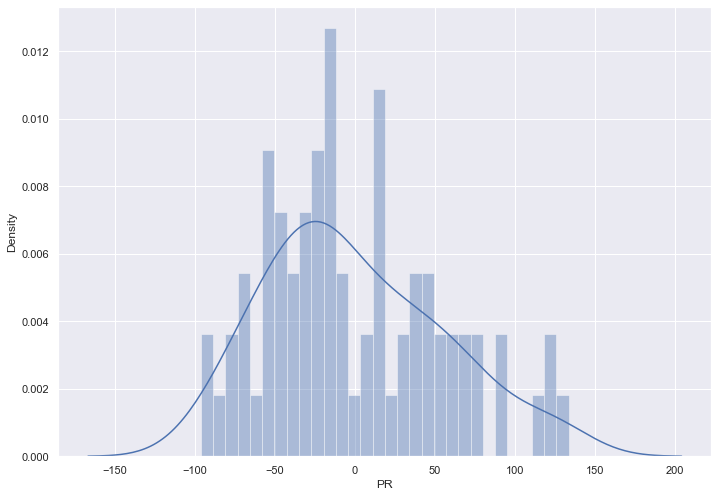

In [14]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.distplot(predictors['PR'], bins=30)
plt.show()

/Users/ariannavaruolo/miniconda3/envs/keras/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


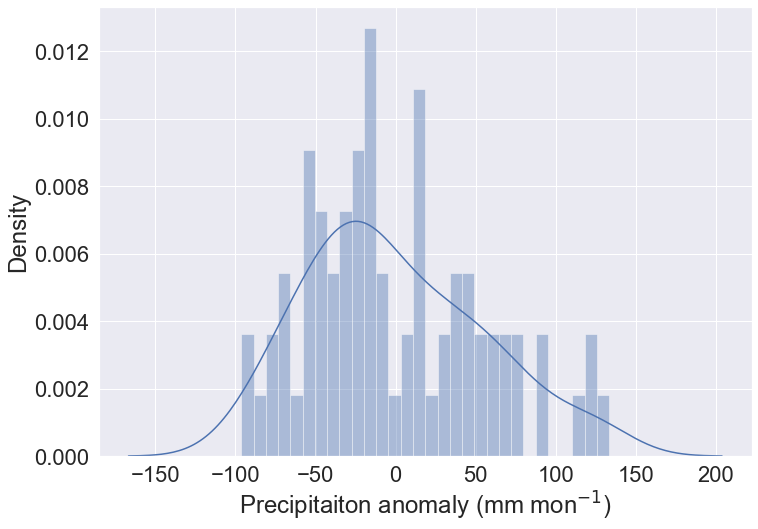

In [15]:
fig, ax = plt.subplots(figsize = (11.7,8.27)) # create figure
sns.distplot(predictors['PR'], bins=30, ax=ax)

ax.set_xlabel('Precipitaiton anomaly (mm mon$^{-1}$)', fontsize = 24)
ax.set_ylabel('Density', fontsize = 24)
ax.tick_params(axis='both', labelsize=22)

#fig.savefig('ML_project_precipitation_dist.png', bbox_inches='tight', transparent = False)

<AxesSubplot:>

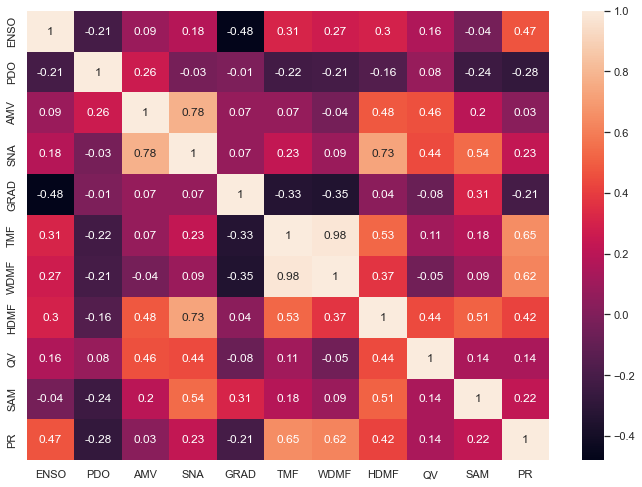

In [16]:
correlation_matrix = predictors.corr().round(2)
# annot = True to print the values inside the square
sns.heatmap(data=correlation_matrix, annot=True)

<AxesSubplot:>

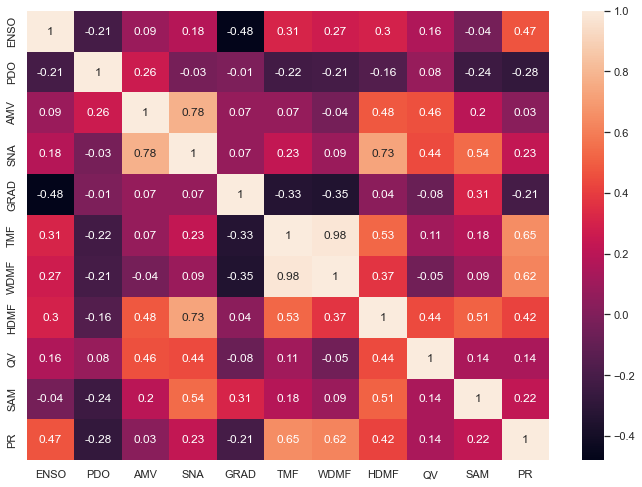

In [17]:
fig, ax = plt.subplots(figsize = (11.7,8.27)) # create figure
sns.heatmap(data=correlation_matrix, annot=True, ax=ax)

#ax.set_xlabel('Precipitaiton anomaly (mm mon$^{-1}$)', fontsize = 24)
#ax.set_ylabel('Density', fontsize = 24)
#ax.tick_params(axis='both', labelsize=22)

#fig.savefig('ML_project_correlation_heat_map.png', bbox_inches='tight', facecolor = 'w', transparent = False)

The correlation coefficient ranges from -1 to 1. If the value is close to 1, it means that there is a strong positive correlation between the two variables. When it is close to -1, the variables have a strong negative correlation.

#### Because WDMF and TMF correlate so highly, should only use TMF

In [18]:
from sklearn.model_selection import train_test_split

In [19]:
X = predictors[['ENSO', 'PDO', 'AMV', 'SNA', 'GRAD', 'TMF', 'HDMF', 'QV', 'SAM']]
X.head()

,ENSO,PDO,AMV,SNA,GRAD,TMF,HDMF,QV,SAM
0,25.889908,-1.682120,0.055977,26.634777,-0.393548,-63.756079,-6.346638,4.027290,-2.264632
1,24.644358,-1.656283,-0.002819,26.943346,-1.160739,-1.661660,-0.651827,0.987180,-1.846696
2,25.366077,-1.739386,0.071659,26.900610,1.964946,5.257056,-0.257847,-0.566658,-0.699164
3,26.729053,-1.698638,0.058565,26.813490,-1.532392,-5.095347,1.039970,-1.399819,-1.751757
4,26.601658,-1.910678,0.222424,27.190292,-0.217099,0.897549,0.335203,-2.811634,-1.705375


In [20]:
Y = predictors['PR']

In [21]:
Y.head()

0   -77.771730
1   -52.998200
2    17.117737
3   -63.901855
4   -67.280270
Name: PR, dtype: float64

In [22]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=5)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(57, 9)
(15, 9)
(57,)
(15,)


In [51]:
#print(Y_train)

In [24]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

lin_model = LinearRegression()
lin_model.fit(X_train, Y_train)

LinearRegression()

In [25]:
import sklearn as sk

In [26]:
# model evaluation for training set
y_train_predict = lin_model.predict(X_train)
rmse = (np.sqrt(mean_squared_error(Y_train, y_train_predict)))
r2 = sk.metrics.r2_score(Y_train, y_train_predict)

print("The model performance for training set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))
print("\n")

# model evaluation for testing set
y_test_predict = lin_model.predict(X_test)
rmse = (np.sqrt(mean_squared_error(Y_test, y_test_predict)))
r2 = sk.metrics.r2_score(Y_test, y_test_predict)

print("The model performance for testing set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))

The model performance for training set
--------------------------------------
RMSE is 35.5319900979125
R2 score is 0.6212112723215804


The model performance for testing set
--------------------------------------
RMSE is 45.512718167424005
R2 score is -0.14247768288395068


#### Y_train and Y_test is the label data 
#### X_train and X_test is the data 

In [27]:
train_data = X_train.to_numpy()
test_data = X_test.to_numpy()

In [28]:
train_labels = Y_train.to_numpy()
test_labels = Y_test.to_numpy()

In [29]:
mean = train_data.mean(axis=0)
std = train_data.std(axis=0)
train_data = (train_data - mean) / std 
test_data = (test_data - mean) / std

print(train_data[0])  

[ 0.76247196 -0.66416772 -1.98226069 -1.8417166   0.97142875  0.69288018
 -0.30970072 -1.09695733 -1.62564815]


#### Build the model

In [30]:
model = keras.Sequential([
    keras.layers.Dense(128, activation=tf.nn.relu, #activation=tf.keras.activations.linear,
                       input_shape=(train_data.shape[1],),
                       name='hidden_layer_1',),
    keras.layers.Dense(128, activation=tf.nn.relu,
                       name='hidden_layer_2',),
    keras.layers.Dense(128, activation=tf.nn.relu,
                       name='hidden_layer_3',),
    #keras.layers.Dense(16, activation=tf.nn.relu,
    #                   name='hidden_layer_4',),
    #keras.layers.Dense(16, activation=tf.nn.relu,
    #                   name='hidden_layer_5',),
    keras.layers.Dense(1, name='output_layer',)
])

# Define optimizer 
optimizer = tf.optimizers.Adam()

model.compile(loss='mse',
            optimizer=optimizer,
            metrics=['mae'])

In [31]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
hidden_layer_1 (Dense)       (None, 128)               1280      
_________________________________________________________________
hidden_layer_2 (Dense)       (None, 128)               16512     
_________________________________________________________________
hidden_layer_3 (Dense)       (None, 128)               16512     
_________________________________________________________________
output_layer (Dense)         (None, 1)                 129       
Total params: 34,433
Trainable params: 34,433
Non-trainable params: 0
_________________________________________________________________


#### Is ~5000 parameters overkill? Let's find out by decreasing the amount of parameters, by making the neural net layers smaller

With only 57 inputs, 449 parameters might just do the trick. 

#### Train the model

In [32]:
class PrintDot(keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs):
        if epoch % 100 == 0: print('')
        print('.', end='')
        
def plot_history(history):
    plt.figure()
    plt.xlabel('Epoch')
    plt.ylabel('Mean Abs Error [mm mon$^{-1}$]')
    plt.plot(history.epoch, np.array(history.history['loss']),
           label='Train Loss')
    plt.plot(history.epoch, np.array(history.history['val_loss']),
           label = 'Val loss')
    plt.legend()
    #plt.ylim([0, 5])


..................................................

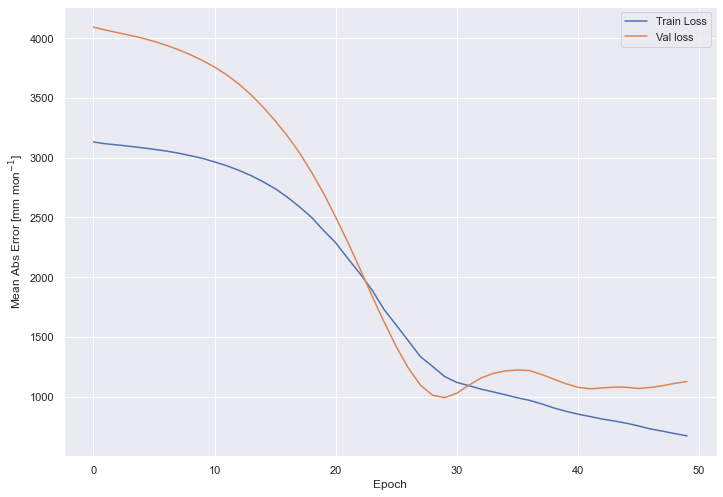

In [33]:
early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=20)

# Store training stats
history = model.fit(train_data, train_labels, epochs=1000,
                    validation_split=0.2, verbose=0,
                    callbacks=[early_stop, PrintDot()])

plot_history(history)

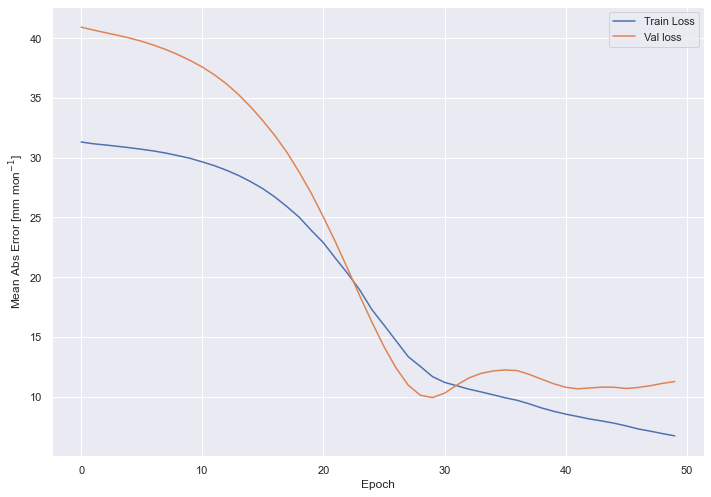

In [34]:
plt.figure()
plt.xlabel('Epoch')
plt.ylabel('Mean Abs Error [mm mon$^{-1}$]')
plt.plot(history.epoch, np.array(history.history['loss'])/100,
       label='Train Loss')
plt.plot(history.epoch, np.array(history.history['val_loss'])/100,
       label = 'Val loss')
plt.legend()

#plt.savefig('ML_project_train_val_3relu_128neurons_sim5.png', bbox_inches='tight', facecolor = 'w', transparent = False)

#### !!overfitting happens when the training loss values fall below the validation loss values!!

#### validation loss should be higher than training loss?

#### Evaluate on test data

In [35]:
[loss, mae] = model.evaluate(test_data, test_labels, verbose=0)

print("Testing set Mean Abs Error: {:7.2f}".format(mae))

Testing set Mean Abs Error:   38.57


In [36]:
# MAE with 64 neurons: 39.32
# MAE with 16 neurons: 38.08
# a little bit lower is a little bit better

#### Predict (using test data)

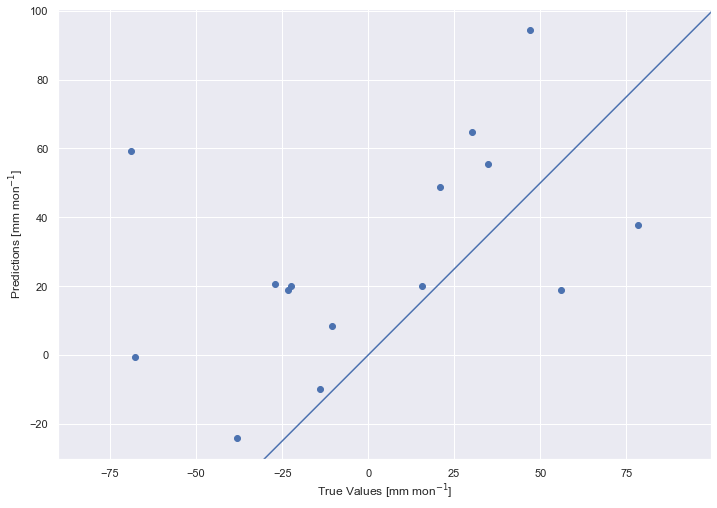

In [37]:
test_predictions = model.predict(test_data).flatten()

plt.scatter(test_labels, test_predictions)
plt.xlabel('True Values [mm mon$^{-1}$]')
plt.ylabel('Predictions [mm mon$^{-1}$]')
plt.axis('equal')
plt.xlim(plt.xlim())
plt.ylim(plt.ylim())
_ = plt.plot([-100, 100], [-100, 100])

#plt.savefig('ML_project_prediction_3relu_128neurons_sim5.png', bbox_inches='tight', facecolor = 'w', transparent = False)

In [38]:
np.corrcoef(test_labels,test_predictions)[0,1]

0.4579836471326431

In [40]:
from sklearn.metrics import r2_score
r2_score(test_labels,test_predictions)

-0.29210038638404834

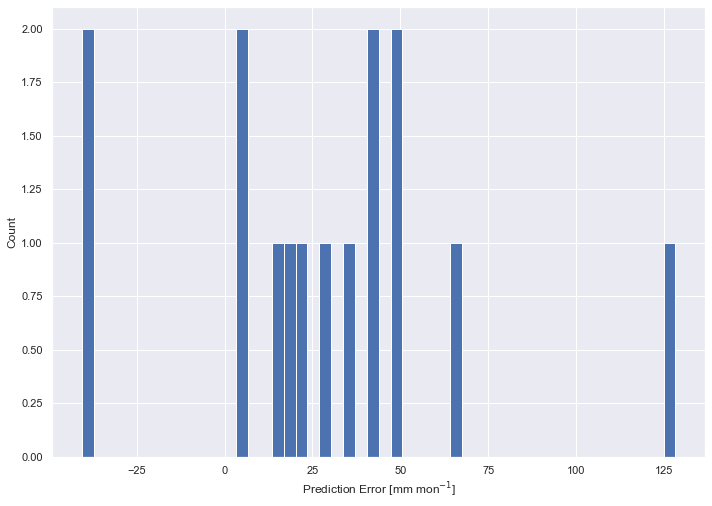

In [42]:
error = test_predictions - test_labels
plt.hist(error, bins = 50)
plt.xlabel('Prediction Error [mm mon$^{-1}$]')
_ = plt.ylabel('Count')

#plt.savefig('ML_project_hist_3relu_128neurons_sim5.png', bbox_inches='tight', facecolor = 'w', transparent = False)

In [43]:
## shape of the errors, are we seeing any major biases in the errors? 